<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [243]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [244]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [245]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    #dlib functions:
    allpoints = []
    p = "shape_predictor_68_face_landmarks.dat"
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(p)

    gray_img=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    h,w = gray_img.shape
    mask = cv2.resize(mask, (w,h), interpolation = cv2.INTER_AREA)
    #from https://pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/
    landmarks = predictor(gray_img, detector(face)[0])
    for n in range(0,68):
        if(n == 2 or n == 8 or n == 14 or n == 28):
            allpoints.append( (landmarks.part(n).x, landmarks.part(n).y))

    pst2 = np.float32([[allpoints[0][0],allpoints[0][1]],
                    [allpoints[1][0],allpoints[1][1]],
                    [allpoints[2][0],allpoints[2][1]],
                    [allpoints[3][0],allpoints[3][1]]])
    
    pst1 = np.float32([[160,390], 
                    [615,840],
                    [1105,390]  
                    ,[615,190]])
    
    #perspective transform:
    M = cv2.getPerspectiveTransform(pst1, pst2)
    result = cv2.warpPerspective(mask, M, (w,h))
    return cv2.addWeighted(face,1, result,0.9,0)
    
    

<h3><font color = "#079e05"> Show the result </font></h3>

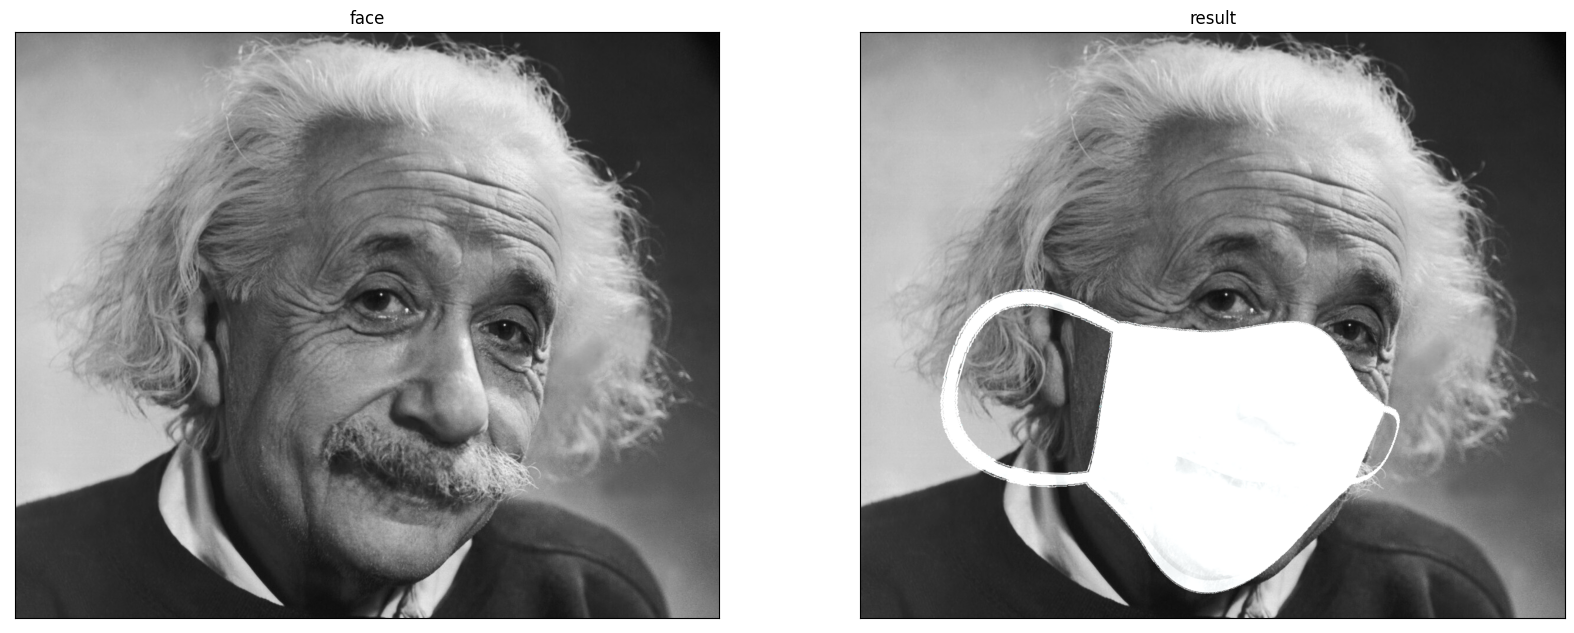

In [246]:
image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'mask.jpg')), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')